# **Using RandomSearchCV(model= KerasClassifier(builf_fn= model , param_distrubutions=dictionsry ,cv=KFold(3)**






In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
print((cancer['data'].shape, cancer['target'].shape))
X=cancer['data']
y=cancer['target']

((569, 30), (569,))


Model function with Learning rate & activation paremeters. Using 1 input, 1 hidden & 1 output layer .Output has sigmoid activation as we are dealing with binary classification.We can only change the activation of the other layers

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense

In [0]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.30)

In [0]:
(X_train.shape,y_train.shape)

In [0]:
print((cancer['data'].shape, cancer['target'].shape))

((569, 30), (569,))


In [0]:
(X_test.shape,y_test.shape)

((171, 30), (171,))

In [0]:
def my_model(learning_rate=0.01,activation='relu'):
  opt=Adam(learning_rate=learning_rate)
  model=Sequential()
  model.add(Dense(148,input_shape=(30,),activation=activation))
  model.add(Dense(296,activation=activation ))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model 

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [0]:
model=KerasClassifier(build_fn=my_model)
params = {'activation': ['relu','tanh'], 'batch_size': [32,128,256], 
          'epochs': [50,100,200], 'learning_rate': [0.1,0.01,0.001]}

random_search=RandomizedSearchCV(model,param_distributions=params,cv=KFold(3))


In [0]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

In [0]:
stop_early=EarlyStopping(monitor='val_acc',patience=3)

In [0]:
history=random_search.fit(X_train,y_train,callbacks=[stop_early])

Epoch 1/100
9/9 [==============================] - 0s 3ms/step - loss: 2.6324 - accuracy: 0.4189
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8217 - accuracy: 0.5925
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8240 - accuracy: 0.5358
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5057
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7349 - accuracy: 0.5660
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.6264
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.6868
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.7170
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7199 - accuracy: 0.4981
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5208
Epoch 11/100
9/9 [===========

In [28]:
history.best_score_

0.9171223441759745

In [29]:
history.best_params_

{'activation': 'tanh',
 'batch_size': 128,
 'epochs': 200,
 'learning_rate': 0.001}

# **With above best params we train our model.The my_model() function is redefined with the new params**

In [0]:
def my_model(learning_rate=0.001,activation='relu'):
  opt=Adam(learning_rate=learning_rate)
  model=Sequential()
  model.add(Dense(148,input_shape=(30,),activation='relu'))
  model.add(Dense(296,activation=activation ))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model 

In [0]:
my_model=my_model(learning_rate=0.001,activation='relu')

In [45]:
historynew=my_model.fit(X_train,y_train,batch_size=128,epochs=200,validation_split=0.3)

Epoch 1/200
3/3 [==============================] - 0s 39ms/step - loss: 0.2413 - accuracy: 0.9281 - val_loss: 0.2929 - val_accuracy: 0.9250
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 0.2226 - accuracy: 0.9245 - val_loss: 0.3101 - val_accuracy: 0.9417
Epoch 3/200
3/3 [==============================] - 0s 13ms/step - loss: 0.2379 - accuracy: 0.9353 - val_loss: 0.2782 - val_accuracy: 0.9333
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1873 - accuracy: 0.9245 - val_loss: 0.2744 - val_accuracy: 0.9250
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 0.2596 - accuracy: 0.9281 - val_loss: 0.2774 - val_accuracy: 0.9333
Epoch 6/200
3/3 [==============================] - 0s 13ms/step - loss: 0.1817 - accuracy: 0.8957 - val_loss: 0.2659 - val_accuracy: 0.9250
Epoch 7/200
3/3 [==============================] - 0s 13ms/step - loss: 0.2016 - accuracy: 0.9353 - val_loss: 0.2670 - val_accuracy: 0.9333
Epoch 8/200
3/3 [===

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_loss(loss,val_loss):
  plt.figure(edgecolor='yellow')
  plt.plot(loss,color='red')
  plt.plot(val_loss,color='green')
  plt.xlabel('EPOCHS')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.title('Training vs Validation Loss')
  plt.show()

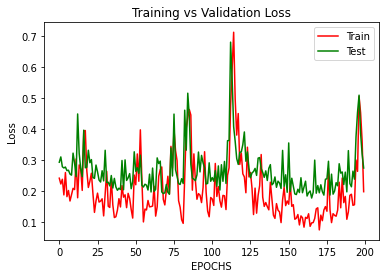

In [55]:
plot_loss(historynew.history['loss'],historynew.history['val_loss'])

In [0]:
def plot_accuracy(acc,val_acc):
  plt.figure(edgecolor='yellow')
  plt.plot(acc,color='red')
  plt.plot(val_acc,color='green')
  plt.xlabel('EPOCHS')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.title('Training vs Validation accuracy')
  plt.show()

In [58]:
for i in historynew.history.keys():
  print(i)

loss
accuracy
val_loss
val_accuracy


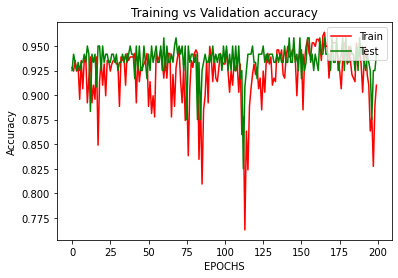

In [60]:
plot_accuracy(historynew.history['accuracy'],historynew.history['val_accuracy'])

# Fitting the model on the whole X and **y**

In [70]:
historynew=my_model.fit(X,y,batch_size=128,epochs=200,validation_split=0.2)

Epoch 1/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1004 - accuracy: 0.9604 - val_loss: 0.2172 - val_accuracy: 0.9035
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0722 - accuracy: 0.9758 - val_loss: 0.0894 - val_accuracy: 0.9649
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0768 - accuracy: 0.9692 - val_loss: 0.3545 - val_accuracy: 0.8333
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0853 - accuracy: 0.9736 - val_loss: 0.0992 - val_accuracy: 0.9561
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0807 - accuracy: 0.9648 - val_loss: 0.1039 - val_accuracy: 0.9649
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0603 - accuracy: 0.9692 - val_loss: 0.1638 - val_accuracy: 0.9474
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0640 - accuracy: 0.9780 - val_loss: 0.0889 - val_accuracy: 0.9561
Epoch 8/200
4/4 [===

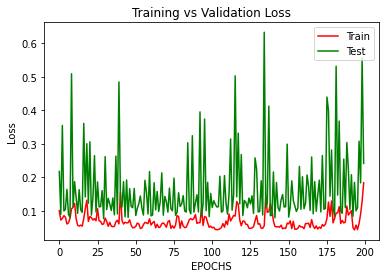

In [71]:
plot_loss(historynew.history['loss'],historynew.history['val_loss'])

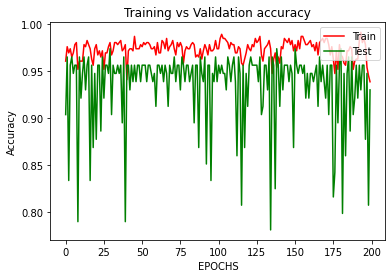

In [72]:
plot_accuracy(historynew.history['accuracy'],historynew.history['val_accuracy'])